# Question 5:

Write a program to download the data from the given API link and then extract the following data with
proper formatting

Link - http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes
Note - Write proper code comments wherever needed for the code understanding

Excepted Output Data Attributes -
- id - int 
- url - string
- name - string 
- season - int 
- number - int
- type - string 
- airdate - date format 
- airtime - 12-hour time format
- runtime - float
- average rating - float
- summary - string 
- without html tags medium image link - string
- Original image link - string

In [ ]:
import requests
import pandas as pd

# Make API call and get response
response = requests.get('https://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes')
data = response.json()

# Normalize JSON data and create dataframe
df = pd.json_normalize(data['_embedded']['episodes'])

In [ ]:
df[:2]

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,summary,rating.average,image.medium,image.original,_links.self.href,_links.show.href
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,2016-10-03T01:00:00+00:00,68,<p>A woman named Dolores is a free spirit in t...,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/869671,https://api.tvmaze.com/shows/1371
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,2016-10-10T01:00:00+00:00,60,<p>Bernard suspects that someone is sabotaging...,7.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/911201,https://api.tvmaze.com/shows/1371


In [ ]:
# Dropping Extra columns

df.drop(columns = ['_links.self.href','_links.show.href'],inplace = True)

In [ ]:
# Checking the Data type of Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              36 non-null     int64  
 1   url             36 non-null     object 
 2   name            36 non-null     object 
 3   season          36 non-null     int64  
 4   number          36 non-null     int64  
 5   type            36 non-null     object 
 6   airdate         36 non-null     object 
 7   airtime         36 non-null     object 
 8   airstamp        36 non-null     object 
 9   runtime         36 non-null     int64  
 10  summary         36 non-null     object 
 11  rating.average  36 non-null     float64
 12  image.medium    36 non-null     object 
 13  image.original  36 non-null     object 
dtypes: float64(1), int64(4), object(9)
memory usage: 4.1+ KB


In [ ]:
# Converting  runtime to float
df['runtime'] = df['runtime'].astype(float)

# Converting  airdate to datetime
df['airdate'] = pd.to_datetime(df['airdate'])

# Converting airstamp to 12-hour format
df['airtime'] = pd.to_datetime(df['airtime'], format='%H:%M')
df['airtime'] = df['airtime'].dt.strftime('%I:%M %p')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              36 non-null     int64         
 1   url             36 non-null     object        
 2   name            36 non-null     object        
 3   season          36 non-null     int64         
 4   number          36 non-null     int64         
 5   type            36 non-null     object        
 6   airdate         36 non-null     datetime64[ns]
 7   airtime         36 non-null     object        
 8   airstamp        36 non-null     object        
 9   runtime         36 non-null     float64       
 10  summary         36 non-null     object        
 11  rating.average  36 non-null     float64       
 12  image.medium    36 non-null     object        
 13  image.original  36 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory

In [ ]:
# Removing HTML tags using BeautifulSoup

from bs4 import BeautifulSoup

df['summary'] = df['summary'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

In [ ]:
df[:2]

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,summary,rating.average,image.medium,image.original
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00 PM,2016-10-03T01:00:00+00:00,68.0,A woman named Dolores is a free spirit in the ...,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00 PM,2016-10-10T01:00:00+00:00,60.0,Bernard suspects that someone is sabotaging th...,7.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [ ]:
# Export the DataFrame to an Excel file

df.to_excel("Cleaned Data.xlsx", index=False)

# Question 8:

Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -

- Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.
- Get all the episode names, whose average rating is more than 8 for every season
- Get all the episode names that aired before May 2019
- Get the episode name from each season with the highest and lowest rating
- Get the summary for the most popular ( ratings ) episode in every season

In [ ]:
ratings = df.groupby('season')['rating.average'].mean().reset_index()
ratings

,season,rating.average
0,1,8.0900
1,2,8.0000
2,3,7.7750
3,4,7.5375


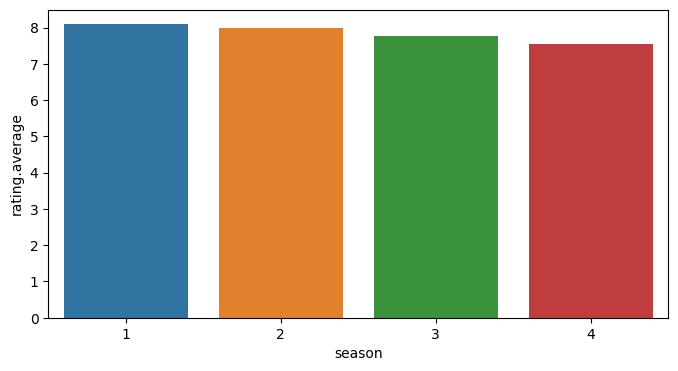

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (8,4))
sns.barplot( x= 'season', y= 'rating.average', data = ratings)
plt.show()

In [ ]:
# Get all the episode names, whose average rating is more than 8 for every season

df[['name','rating.average','season']][df['rating.average']>8].reset_index()

,index,name,rating.average,season
0,6,Trompe L'Oeil,8.6,1
1,8,The Well-Tempered Clavier,8.5,1
2,9,The Bicameral Mind,8.7,1
3,17,Kiksuya,8.7,2
4,18,Vanishing Point,8.4,2
5,19,The Passenger,8.5,2


In [ ]:
# Get all the episode names that aired before May 2019
df[df['airdate'] < '2019-05-01'] 

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,summary,rating.average,image.medium,image.original,year
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00 PM,2016-10-03T01:00:00+00:00,68.0,A woman named Dolores is a free spirit in the ...,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,2016
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00 PM,2016-10-10T01:00:00+00:00,60.0,Bernard suspects that someone is sabotaging th...,7.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,2016
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,09:00 PM,2016-10-17T01:00:00+00:00,60.0,Bernard continues to investigate Dolores' supp...,7.6,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,2016
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,09:00 PM,2016-10-24T01:00:00+00:00,60.0,While Dolores joins William and Logan on their...,7.9,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,2016
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,09:00 PM,2016-10-31T01:00:00+00:00,60.0,Dolores takes the first step on her path of di...,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,2016
5,932057,https://www.tvmaze.com/episodes/932057/westwor...,The Adversary,1,6,regular,2016-11-06,09:00 PM,2016-11-07T02:00:00+00:00,60.0,"While Maeve convinces Felix to show her ""upsta...",8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,2016
6,938404,https://www.tvmaze.com/episodes/938404/westwor...,Trompe L'Oeil,1,7,regular,2016-11-13,09:00 PM,2016-11-14T02:00:00+00:00,60.0,While William and Dolores travel to the unclai...,8.6,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,2016
7,943065,https://www.tvmaze.com/episodes/943065/westwor...,Trace Decay,1,8,regular,2016-11-20,09:00 PM,2016-11-21T02:00:00+00:00,60.0,Bernard tries to cope with what he did under R...,7.9,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,2016
8,943066,https://www.tvmaze.com/episodes/943066/westwor...,The Well-Tempered Clavier,1,9,regular,2016-11-27,09:00 PM,2016-11-28T02:00:00+00:00,60.0,Bernard forces Robert to take him back into hi...,8.5,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,2016
9,943067,https://www.tvmaze.com/episodes/943067/westwor...,The Bicameral Mind,1,10,regular,2016-12-04,09:00 PM,2016-12-05T02:00:00+00:00,90.0,Delores finds out the truth about William's fa...,8.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,2016


In [ ]:
# Get the episode name from each season with the highest and lowest rating

# for season 1 
season1 = df[['name','season','rating.average']][df['season']== 1].sort_values(by = 'rating.average',ascending = False).reset_index()
season1[(season1['rating.average'] == season1['rating.average'].max() ) | (season1['rating.average'] == season1['rating.average'].min())]

,index,name,season,rating.average
0,9,The Bicameral Mind,1,8.7
9,2,The Stray,1,7.6


In [ ]:
# for season 2
season2 = df[['name','season','rating.average']][df['season']== 2].sort_values(by = 'rating.average',ascending = False).reset_index()
season2[(season2['rating.average'] == season2['rating.average'].max() ) | (season2['rating.average'] == season2['rating.average'].min())]

,index,name,season,rating.average
0,17,Kiksuya,2,8.7
9,14,Akane No Mai,2,7.6


In [ ]:
# for season 3 
season3 = df[['name','season','rating.average']][df['season']== 3].sort_values(by = 'rating.average',ascending = False).reset_index()
season3[(season3['rating.average'] == season3['rating.average'].max() ) | (season3['rating.average'] == season3['rating.average'].min())]

,index,name,season,rating.average
0,20,Parce Domine,3,8.0
1,23,The Mother of Exiles,3,8.0
6,25,Decoherence,3,7.5
7,26,Passed Pawn,3,7.5


In [ ]:
# for season4 
season4 = df[['name','season','rating.average']][df['season']== 4].sort_values(by = 'rating.average',ascending = False).reset_index()
season4[(season4['rating.average'] == season4['rating.average'].max() ) | (season4['rating.average'] == season4['rating.average'].min())]

,index,name,season,rating.average
0,32,Zhuangzi,4,7.8
7,28,The Auguries,4,7.1


In [ ]:
# Get the summary for the most popular ( ratings ) episode in every season

In [ ]:
df.head(2)

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,summary,rating.average,image.medium,image.original,year
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00 PM,2016-10-03T01:00:00+00:00,68.0,A woman named Dolores is a free spirit in the ...,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,2016
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00 PM,2016-10-10T01:00:00+00:00,60.0,Bernard suspects that someone is sabotaging th...,7.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,2016
